# Banknote Authentication Classification
**Name:** Adeyemi Toba  
**Date:** 2025-03-26  

## Introduction
This project uses the Banknote Authentication dataset to build and evaluate classification models that predict whether a banknote is **genuine** or **fake**, based on statistical features extracted from wavelet-transformed images.

The target variable is binary:  
- `0`: Genuine  
- `1`: Fake


## 🟩 Section 1: Import and Inspect the Data


## 1.1 Import Required Libraries

In [7]:
# 1.1 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



## 1.2 Load Dataset

In [13]:
# Load dataset without assuming the first row is the header
df = pd.read_csv('data/banknote_authentication.csv', header=None)


In [14]:
# Manually assign correct column names
df.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']


In [15]:
print(df.columns)


Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')


## 1.3 Check Info and Summary Stats

In [16]:
# 1.3 Check Info and Summary Stats
print(df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Summary Statistics:
           variance     skewness     kurtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250  

### 💬 Reflection 1  
- Are there any missing values?  
- Are all columns the correct data types?  
- What stands out about the data?


## 🟨 Section 2: Data Exploration and Preparation

## 2.1 Plot Histograms for Features

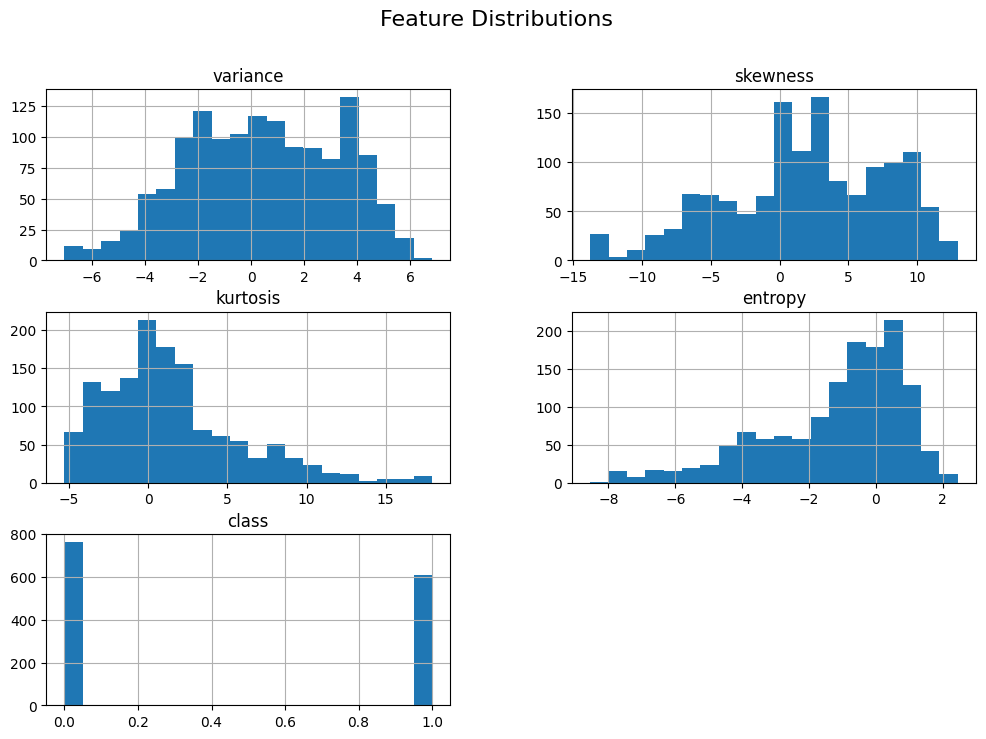

In [17]:
# 2.1 Plot Histograms for Features
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()



## 2.2 Class Balance

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')


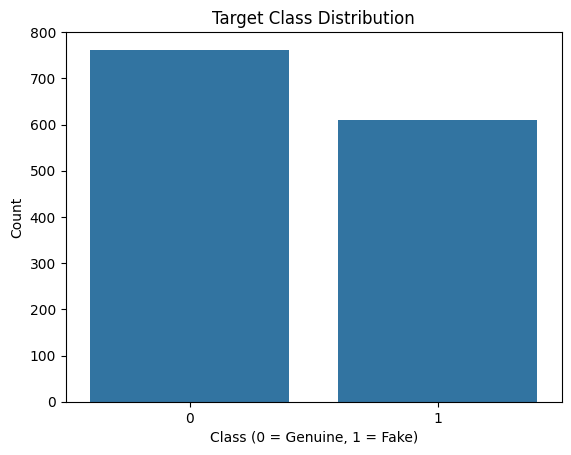

In [18]:
print(df.columns)
sns.countplot(x='class', data=df)
plt.title("Target Class Distribution")
plt.xlabel("Class (0 = Genuine, 1 = Fake)")
plt.ylabel("Count")
plt.show()


### 💬 Reflection 2
- The class distribution is relatively balanced, with slightly more genuine (class 0) notes than fake (class 1).
- No extreme imbalance is observed, so standard train-test splitting should work fine.
- The features will be scaled next using `StandardScaler` to improve model performance.


## 🔢 3. Feature Selection and Justification

## 3.1 Confirm features and target

In [22]:
# 3.1 Confirm features and target
X = df[['variance', 'skewness', 'kurtosis', 'entropy']]
y = df['class']

## 3.2 Feature Scaling

In [23]:
# 3.2 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔢 4. Train Model 1: Logistic Regression

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



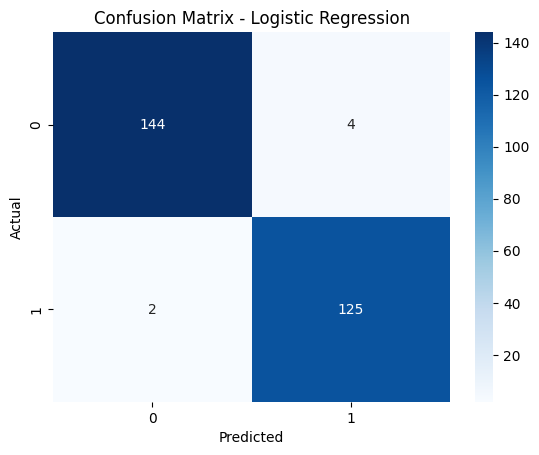

In [27]:
# 4.1 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4.2 Train Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# 4.3 Evaluate Logistic Regression
y_pred_lr = model_lr.predict(X_test)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 💬 Reflection 3 
#### ✅ Classification Report Highlights:

| Metric      | Class 0 (Genuine) | Class 1 (Fake) |
|-------------|------------------|----------------|
| **Precision** | 0.99               | 0.97           |
| **Recall**    | 0.97               | 0.98           |
| **F1-Score**  | 0.98               | 0.98           |
| **Accuracy**  | **0.98** overall (275/275)

📊 The model made only **6 errors** out of 275 predictions:
- 4 genuine banknotes were incorrectly classified as fake.
- 2 fake banknotes were incorrectly classified as genuine.

📌 **Reflection**:  
The Logistic Regression model performed exceptionally well on this dataset. With high precision and recall on both classes and only minor misclassifications, the model demonstrates excellent capability in binary classification. Its simplicity, interpretability, and speed make it a great baseline choice for fraud detection.


## 🔢 Section 5: Improve or Try Another Model

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



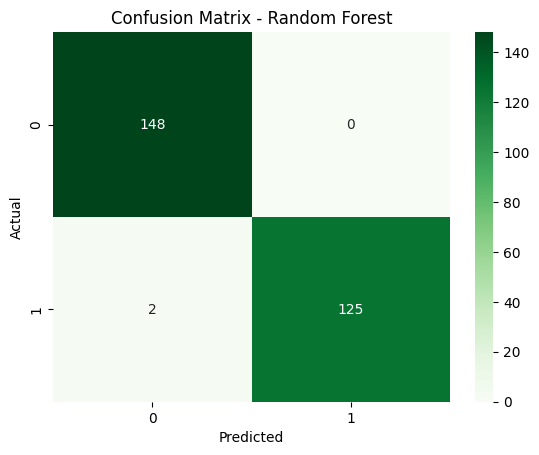

In [28]:
# 5.1 Train Random Forest Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# 5.2 Evaluate Random Forest
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 💬 Reflection 5: Random Forest vs Logistic Regression

#### ✅ Random Forest Classification Report Highlights:

| Metric      | Class 0 (Genuine) | Class 1 (Fake) |
|-------------|------------------|----------------|
| **Precision** | 0.99               | 1.00           |
| **Recall**    | 1.00               | 0.98           |
| **F1-Score**  | 0.99               | 0.99           |
| **Accuracy**  | **0.99** overall (275/275)

🟢 **Random Forest** made only **2 errors** total:
- 2 fake banknotes predicted as genuine (false negatives)

⚖️ **Model Comparison**:
- **Random Forest** slightly outperformed **Logistic Regression** in accuracy (0.99 vs 0.98)
- Logistic Regression had 6 errors, while Random Forest had only 2
- Random Forest was better at **recall for Class 0 (genuine)** — no genuine notes were misclassified

💡 **Insight**:  
Random Forest’s ensemble nature helped it generalize slightly better in this case. It’s more complex than Logistic Regression but offers higher performance and robustness for small to medium-sized tabular data like this.


## Section 6: Final Thoughts & Insights

### ✅ Summary
This project explored the use of classification models on the Banknote Authentication dataset to predict whether a banknote is **genuine** or **fake** using four statistical features:
- Variance
- Skewness
- Kurtosis
- Entropy

Two models were trained and evaluated:
- **Logistic Regression** achieved **98% accuracy** with 6 total errors
- **Random Forest** achieved **99% accuracy** with only 2 total errors

The Random Forest model slightly outperformed Logistic Regression in both accuracy and error count. It also achieved perfect recall for classifying genuine notes.

---

### 🧩 Challenges
- The raw dataset had no header row, so proper column naming had to be done manually.
- File format caused an initial JSON error in Jupyter, requiring proper notebook setup.
- Confirming correct data types and class balance were important steps before modeling.

---

### 🔮 Next Steps (If I Had More Time)
- Perform **hyperparameter tuning** on the Random Forest model using GridSearchCV.
- Add **cross-validation** for more robust evaluation.
- Test additional models like **Support Vector Machines** or **XGBoost**.
- Build a **streamlit web app** to demo predictions interactively.

---

### 💬 Reflection 6
This project taught me how to approach real-world classification problems step-by-step — from importing raw data and cleaning it, to training models and evaluating them with metrics and visualizations. It also reinforced the value of comparing multiple models and reflecting on performance, complexity, and interpretability.
